<a href="https://colab.research.google.com/github/ak3ra/datascience-africa-talks/blob/master/intro_to_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**A brief Introduction to Pytorch**



---



 *Data Science Africa ,  Wednesday, October 6, 2021
Kimberley, South Africa*
<br>

**Benjamin Akera**
<br>
**McGill University**
<br>
**Mila Quebec AI Institute**
<br>
**Sunbird.ai**


---






---



# **1 . What is Pytorch** ?

<p>PyTorch is an optimized tensor library primarily used for Deep Learning applications using GPUs and CPUs. It is an open-source machine learning library for Python, mainly developed by the Facebook AI Research team. </p>

In [ ]:
!pip install torch

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
z = torch.zeros(5, 3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [ ]:
i = torch.ones((5, 3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [ ]:
torch.manual_seed(1729)
r1 = torch.rand(2, 2)
print('A random tensor:')
print(r1)

r2 = torch.rand(2, 2)
print('\nA different random tensor:')
print(r2) # new values

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print('\nShould match r1:')
print(r3) # repeats values of r1 because of re-seed

A random tensor:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

A different random tensor:
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

Should match r1:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


PyTorch tensors perform arithmetic operations intuitively. Tensors of similar shapes may be added, multiplied, etc. Operations with scalars are distributed over the tensor:

Here's a small sample of the mathematical operations available:

In [ ]:
r = torch.rand(2, 2) - 0.5 * 2 # values between -1 and 1
print('A random matrix, r:')
print(r)

# Common mathematical operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# ...as are trigonometric functions:
print('\nInverse sine of r:')
print(torch.asin(r))

# ...and linear algebra operations like determinant and singular value decomposition
print('\nDeterminant of r:')
print(torch.det(r))
print('\nSingular value decomposition of r:')
print(torch.svd(r))

# ...and statistical and aggregate operations:
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))
print('\nMaximum value of r:')
print(torch.max(r))

A random matrix, r:
tensor([[-0.5784, -0.9309],
        [-0.7668, -0.5953]])

Absolute value of r:
tensor([[0.5784, 0.9309],
        [0.7668, 0.5953]])

Inverse sine of r:
tensor([[-0.6168, -1.1970],
        [-0.8738, -0.6377]])

Determinant of r:
tensor(-0.3695)

Singular value decomposition of r:
torch.return_types.svd(
U=tensor([[-0.7512, -0.6601],
        [-0.6601,  0.7512]]),
S=tensor([1.4415, 0.2563]),
V=tensor([[ 0.6525, -0.7578],
        [ 0.7578,  0.6525]]))

Average and standard deviation of r:
(tensor(0.1656), tensor(-0.7179))

Maximum value of r:
tensor(-0.5784)


<br>
<br>

---



# **2. Tensors and Gradients**
The most basic building block of any Deep Learning library is the tensor. Tensors are matrix-like data structures very similar in function and properties to Numpy arrays. In fact, for most purposes you can think of them exactly like Numpy arrays. <br><br>
The key differences between the two is that the implementation of tensors in modern Deep Learning libraries can run on CPU or GPU (very fast) and tensors are immutable

<br>
<br>

In [ ]:
import torch 
x = torch.Tensor(3,3)

# this creates a tensor of size 3,3 ie: 3 rows and 3 columns

In [ ]:
x

tensor([[-1.1410e-07,  3.0956e-41,  3.7835e-44],
        [ 0.0000e+00,         nan,  0.0000e+00],
        [ 1.3733e-14,  6.4069e+02,  4.3066e+21]])

In [ ]:
# Create Tensors with Gradients

import torch
a = torch.ones((2,2), requires_grad=True)
a

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [ ]:
#check if tensor requires grad
a.requires_grad

True

In [ ]:
#  Method2: Create Tensors with Gradients 
# Normal way of creating gradients
a = torch.ones((2, 2))

# Requires gradient
a.requires_grad_()

# Check if requires gradient
a.requires_grad

True

In [ ]:
## Tensors with Gradients addition operation behaves similarly to tensors
b = torch.ones((2, 2), requires_grad=True)
print(a + b)
print(torch.add(a, b))

tensor([[2., 2.],
        [2., 2.]], grad_fn=<AddBackward0>)
tensor([[2., 2.],
        [2., 2.]], grad_fn=<AddBackward0>)


In [ ]:
# As usual, the operations we learnt previously for tensors apply for tensors with gradients. 
#Feel free to try divisions, mean or standard deviation!


print(a * b)
print(torch.mul(a, b))

tensor([[1., 1.],
        [1., 1.]], grad_fn=<MulBackward0>)
tensor([[1., 1.],
        [1., 1.]], grad_fn=<MulBackward0>)


What exactly is` requires_grad`? ->
Allows for the calculation of gradients wrt the tensors that all allows 
gradient accumulation

<br> 
consider the equation : <br> <center> $y_i = 5(x_i + 1)^2$ </center>


<br>
<br>


In [ ]:
# Create tensor of size 2x1 filled with 1's that requires gradient


x = torch.ones(2, requires_grad=True)
x

tensor([1., 1.], requires_grad=True)

In [ ]:
# we plug x into the equation above

y = 5 * (x + 1) ** 2
y

tensor([20., 20.], grad_fn=<MulBackward0>)



<br> 
<br>


`backward()` should be called only on a scalar (i.e. 1-element tensor) or with gradient w.r.t. the variable

Let's reduce $y$ to a scalar then...

<center>
$o = \frac{1}{2}\sum_i{y_i}$
</center>

As you can see above, we've created a tensor filled with 20's, so average them would return 20


<br>
<br>

In [ ]:
o = (1/2) * torch.sum(y)
o

tensor(20., grad_fn=<MulBackward0>)

Calculating a derivative: Recall, 

<br>
<br>

<center>
$y_i = 5(x_i + 1) $ 
<br>
$o = \frac{1}{2}\sum_i{y_i}$
<br>
<br>
Substitute $y$ into $o$; eqn $o$: = $\frac{1}{2}\sum_i{5(x_i + 1)}^2$
<br>
<br>
<br>
$ \frac{\partial o}{\partial x_i} = \frac{1}{2}[10(x_i + 1)]$
<br>
<br>
$ \frac{\partial o}{\partial x_i}|x_{i=1} = \frac{1}{2}[10(1 + 1)] = \frac{10}{2}(2) = 10$

</center>

<br>
<br>



We should expect to get 10, and it's so simple to do this with PyTorch with the following line...

Get first derivative

<br>
<br>

``o.backward()``

In [ ]:
o.backward()

In [ ]:
x.grad

tensor([10., 10.])

In [ ]:
#If x requires gradient and you create new objects with it, you get all gradients
print(x.requires_grad)
print(y.requires_grad)
print(o.requires_grad)


True
True
True


<br>
<br>


---





#**3. Linear Regression in Pytorch**

Allows us to understand the relationship between two continous variables

Example:


*   $x$: Independent variable
  *   Weight
* $y$: Dependent Variable
  * height 

$y = \alpha x + \beta$


In [ ]:
 import torch
 import torch.nn as nn
 import torch.functional as F

In [ ]:
## Building a toy dataset

x_values = [i for i in range(11)]


In [ ]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
# convert the list to numpy arrays
x_train = np.array(x_values, dtype=np.float32)

In [ ]:
x_train.shape

(11,)

In [ ]:
## Convert it into a 2D Array
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

We want $y$ values for every $x$ value we have above:

Following the equation:
$y = 2x +1 $

In [ ]:
# Create a list of y values for every x value we have above

y_values = [2*i for i in x_values]


In [ ]:
y_values

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [ ]:
## Convert y_values to numpy arrays and reshape
y_train = np.array(y_values, dtype=np.float32)

y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

<br>
<br>
<br>

---



## **3.1  Building the model**

1. Linear model 
     * True Equation $y = 2x+1$

2. Forward
Example
* input $x = 1$
* Output $ \hat y= ? $

In [ ]:
# Create Linear Regression class 

class LinearRegressionModel(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    out = self.linear(x)
    return out

In [ ]:
# instantiate the model class 
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [ ]:
model

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

<br>
<br>

## **3.2 Instantiate the loss class**

MSE Loss: Mean Squared Error 

$MSE = \frac{1}{n}\sum{\hat y_i - y_i}^2$


*   $\hat y$: prediction
*   $y$: true value



In [ ]:
criterion = nn.MSELoss()

<br>
<br>

## **3.3 Instatiate Optimizer Class**

**Simple Equation** <br>
<br>
$\theta = \theta - \eta . \Delta_{\theta}  $ <br>


<br>

<li> $\theta$ parameters (our tensors with gradient accumulation capabilities)</ul>
<li> $\eta$ learning rate </ul>
<li> $\Delta_{\theta}$ parameters' gradients </ul>

``parameters = parameters - learning_rate * parameters_gradients``

In [ ]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

<br>
<br>
<br>

## **3.4 Train Model**

1 epoch: Going through the whole x_train data once

*   $100$ epochs
  * $100 \times$ mapping ``x_train = [0,1,2,3,4,5,6,7,8,9,10]``

* **Processes**
    1.   Convert inputs to tensors with gradients
    2.   Clear gradient buffers
    3.   Get output given inputs
    4.   Get loss
    5.   Get gradients wrt parameters
    6.   Update parameters using gradients

         * ``parameters = parameters - learning_rate * parameters_gradients``
    7.   Repeat


In [ ]:
epochs = 100

In [ ]:
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 

    # Forward to get output
    outputs = model(inputs)

    # Calculate Loss
    loss = criterion(outputs, labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Updating parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 206.39730834960938
epoch 2, loss 17.292131423950195
epoch 3, loss 1.8623175621032715
epoch 4, loss 0.5987103581428528
epoch 5, loss 0.49065276980400085
epoch 6, loss 0.47690504789352417
epoch 7, loss 0.47090473771095276
epoch 8, loss 0.4655914008617401
epoch 9, loss 0.4603874385356903
epoch 10, loss 0.4552462697029114
epoch 11, loss 0.4501623809337616
epoch 12, loss 0.4451355040073395
epoch 13, loss 0.4401649236679077
epoch 14, loss 0.4352494478225708
epoch 15, loss 0.4303892254829407
epoch 16, loss 0.4255831837654114
epoch 17, loss 0.4208308160305023
epoch 18, loss 0.41613122820854187
epoch 19, loss 0.4114844501018524
epoch 20, loss 0.4068891704082489
epoch 21, loss 0.4023456871509552
epoch 22, loss 0.3978530168533325
epoch 23, loss 0.39340999722480774
epoch 24, loss 0.3890169858932495
epoch 25, loss 0.3846728503704071
epoch 26, loss 0.38037756085395813
epoch 27, loss 0.3761295974254608
epoch 28, loss 0.3719295263290405
epoch 29, loss 0.36777612566947937
epoch 30, loss 0

In [ ]:
# Purely inference
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[ 0.7572152],
       [ 2.6481695],
       [ 4.5391235],
       [ 6.430078 ],
       [ 8.321033 ],
       [10.211987 ],
       [12.1029415],
       [13.993896 ],
       [15.88485  ],
       [17.775805 ],
       [19.666758 ]], dtype=float32)

In [ ]:
# y = 2x + 1 
y_train

array([[ 0.],
       [ 2.],
       [ 4.],
       [ 6.],
       [ 8.],
       [10.],
       [12.],
       [14.],
       [16.],
       [18.],
       [20.]], dtype=float32)

<br>
<br>
<br>

## **3.5 Plot of predicted and actual values**



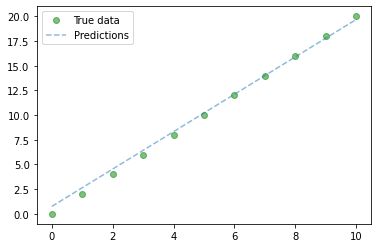

In [ ]:
# Clear figure
plt.clf()

# Get predictions
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

<br>
<br>
<br>

## **3.6 Save Model**

In [ ]:
save_model = False
if save_model is True:
    # Saves only parameters
    # alpha & beta
    torch.save(model.state_dict(), 'awesome_model.pkl')

<br>
<br>

##  **3.7 Load Model**

In [ ]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))

<br>
<br>

 ***The following are left as an exercise to the reader***

1. Try to play around with the parameters; learning rate, try other optimizers
2. Re-implement the Linear Regression Model for a classification task using Logistic Regression
3. 

# **That's all folks** 
**More Resources**


1.   [Pytorch Docs](https://pytorch.org/)
2.   [Pytorch Book](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf)

